# Лабораторная работа №2
## Выполнила студентка группы БСТ1903 Мисевич И.М.

 Реализовать методы поиска в соответствии с заданием. Организовать генерацию
начального набора случайных данных. Для всех вариантов добавить реализацию
добавления, поиска и удаления элементов. Оценить время работы каждого алгоритма
поиска и сравнить его со временем работы стандартной функции поиска, используемой в
выбранном языке программирования. 


### Задание №1:
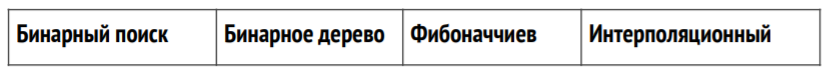

In [16]:
#бинарный поиск
from random import randint

# Создание списка,
# его сортировка по возрастанию
# и вывод на экран
a = []
for i in range(10):
    a.append(randint(1, 50))
a.sort()
print(a)

# искомое число
value = int(input())

mid = len(a) // 2
low = 0
high = len(a) - 1

while a[mid] != value and low <= high:
    if value > a[mid]:
        low = mid + 1
    else:
        high = mid - 1
    mid = (low + high) // 2

if low > high:
    print("No value")
else:
    print("ID =", mid)

[14, 15, 16, 19, 33, 35, 41, 47, 47, 48]
33
ID = 4


In [26]:
#бинарное дерево
class Node:
    def __init__(self, left=None, right=None, data=None):
        self.left = left
        self.right = right
        self.data = data

    def __str__(self):
        return str(self.data)

class Tree:
    def __init__(self, expression):
        self.root = None
        self.add(expression)

    def add(self, expression):
        token_list = list(''.join(expression))
        self.root = self._addToTree(token_list)

    def _addToTree(self, token_list):
        if token_list:
            brackets = 0
            index_sym = 0
            for inx, sym in enumerate(token_list):
                if sym == '(': brackets += 1
                if sym == ')': brackets -= 1
                if (sym != '(') and (sym != ')'): index_sym = inx
                if (brackets == 0) and (sym != ')') and (sym != '('):
                    index_sym = inx
                    break
            return Node(self._addToTree(token_list[1:index_sym]),
                        self._addToTree(token_list[index_sym+2:-1]),
                        token_list[index_sym])

    def InOrder(self):
        self._InOrder(self.root)

    def _InOrder(self, node):
        if (node != None):
            self._InOrder(node.left)
            print( str(node.data), end= ' ' )
            self._InOrder(node.right)

    def PreOrder(self):
        self._PreOrder(self.root)

    def _PreOrder(self, node):
        if (node != None):
            print( str(node.data), end= ' ' )
            self._PreOrder(node.left)
            self._PreOrder(node.right)

    def PostOrder(self):
        self._PostOrder(self.root)

    def _PostOrder(self, node):
        if (node != None):
            self._PostOrder(node.left)
            self._PostOrder(node.right)
            print( str(node.data), end= ' ' )

tree = Tree('((c)b(d))a(((g)f(h))e)')

print('Прямой обход')
tree.PreOrder()

print()
print('Концевой обход')
tree.PostOrder()

print()
print('Обратный обход')
tree.InOrder()

Прямой обход
a b c d e f g h 
Концевой обход
c d b g h f e a 
Обратный обход
c b d a g f h e 

In [24]:
    
# Поиск Фибоначчи 
from bisect import bisect_left
 
# Returns index of x if present,  else
# returns -1
 
 
def fibMonaccianSearch(arr, x, n):
    fibMMm2 = 0
    fibMMm1 = 1  
    fibM = fibMMm2 + fibMMm1  

    while (fibM < n):
        fibMMm2 = fibMMm1
        fibMMm1 = fibM
        fibM = fibMMm2 + fibMMm1
    offset = -1

    while (fibM > 1):
 
        i = min(offset+fibMMm2, n-1)
 
        if (arr[i] < x):
            fibM = fibMMm1
            fibMMm1 = fibMMm2
            fibMMm2 = fibM - fibMMm1
            offset = i
 
        elif (arr[i] > x):
            fibM = fibMMm2
            fibMMm1 = fibMMm1 - fibMMm2
            fibMMm2 = fibM - fibMMm1
 
        else:
            return i
 
    if(fibMMm1 and arr[n-1] == x):
        return n-1
 
    return -1
 
arr = [10, 22, 35, 40, 45, 50,
       80, 82, 85, 90, 100,235]
n = len(arr)
x = 235
ind = fibMonaccianSearch(arr, x, n)
if ind>=0:
  print("Found at index:",ind)
else:
  print(x,"isn't present in the array");

Found at index: 11


In [19]:
#Интерполяционный поиск
def interpolation(val, array):
    low = 0
    high = len(array)-1
    while low <= high and val >= array[low] and val <= array[high]:
        m = low + (high-low)*(val-array[low])//(array[high]-array[low])
        if array[m] == val:
            return m
        elif array[m] < val:
            low = m+1
        else: 
            high = m-1
    return -1

### Задание №2:
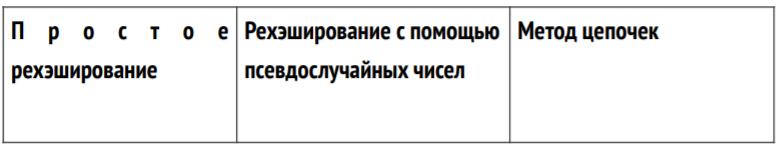

In [27]:
class HashMap:
    def __init__(self):
        self.size = 0
        self.data = []
        self._resize()
    
    def _hash(self, key, i):
        return (hash(key) + i) % len(self.data)
        
    def _find(self, key):
        i = 0;
        index = self._hash(key, i);
        while self.data[index] is not None and self.data[index][0] != key:
            i += 1
            index = self._hash(key, i);
        return index;
    
    def _resize(self):
        temp = self.data
        self.data = [None] * (2*len(self.data) + 1)
        for item in temp:
            if item is not None:
                self.data[self._find(item[0])] = item
    
    def __setitem__(self, key, value):
        if self.size + 1 > len(self.data) // 2:
            self._resize()
        index = self._find(key)
        if self.data[index] is None:  
            self.size += 1
        self.data[index] = (key, value)
    
    def __getitem__(self, key):
        index = self._find(key)
        if self.data[index] is not None:
            return self.data[index][1]
        raise KeyError()

In [11]:
class RandomHashMap(HashMap):
    _rand_c = [5323]
    
    def _rand(self, i):
        if len(self._rand_c) - 1 < i:
            self._rand_c.append(self._rand(i - 1))
        return (123456789 * self._rand_c[i] + 987654321) % 65546
        
    def _hash(self, key, i):
        return (hash(key) + self._rand(i)) % len(self.data)

In [10]:
  
#Метод цепочек
class ChainMap:
    def __init__(self):
        self.size = 0
        self.data = []
        self._resize()
        
def _hash(self, key):
    return hash(key) % len(self.data)
def _insert(self, index, item):
    if self.data[index] is None:
        self.data[index] = [item]
        return True
    else:
        for i, item_ in enumerate(self.data[index]):
            if item_[0] == item[0]:
                self.data[index][i] = item
                return False
        self.data[index].append(item)
        return True
    
def _resize(self):
    temp = self.data
    self.data = [None] * (2*len(self.data) + 1)
    for bucket in temp:
        if bucket is not None:
            for key, value in bucket:
                self._insert(self._hash(key), (key, value))
    
def __setitem__(self, key, value):
    if self.size + 1 > len(self.data) // 1.5:
        self._resize()
    if self._insert(self._hash(key), (key, value)):  
        self.size += 1
    
def __getitem__(self, key):
    index = self._hash(key)
    if self.data[index] is not None:
        for key_, value in self.data[index]:
            if key_ == key:
                return value
    raise KeyError()

### Задание № 3:
Расставить на стандартной 64-клеточной шахматной доске 8 ферзей так, чтобы ни
один из них не находился под боем другого». Подразумевается, что ферзь бьёт все клетки,
расположенные по вертикалям, горизонталям и обеим диагоналям
Написать программу, которая находит хотя бы один способ решения задач. 

In [5]:
n = int(input())
remainder = n % 6
#Если остаток равен 2, поменяйте местами 1 и 3
#в нечетном списке и переместите 5 в конец.
if remainder == 2:
    even = list(range(1, n, 2))
    odd = list(range(2, n, 2))
    odd[1] = 0
    odd.append(4)
#Если остаток равен 3, переместите 2
#до конца четного списка и 1, 3
#до конца нечетного списка.
elif remainder == 3:
    even = list(range(3, n, 2))
    even.append(1)
    odd = list(range(4, n, 2))
    odd.append(0)
    odd.append(2)
#Если остаток от деления n на 6
#это не 2 или 3, то список просто
#все четные числа, за которыми следуют все
#нечетные числа не больше n.
else:
    even = list(range(1, n, 2))
    odd = list(range(0, n, 2))
#Добавить нечетный список к четному списку
#и расставьте королев по рядам
#задается этими числами.
result = even + odd
row = ['.'] * n
for i in range(n):
    j = result[i]
    row[j] = 'F'
    print(*row)
    row[j] = '.'

8
. F . . . . . .
. . . F . . . .
. . . . . F . .
. . . . . . . F
. . F . . . . .
F . . . . . . .
. . . . . . F .
. . . . F . . .
